#Manipulação básica de dados


Baseado em material didático produzido pelo Professor Mark Crovella (Boston University)

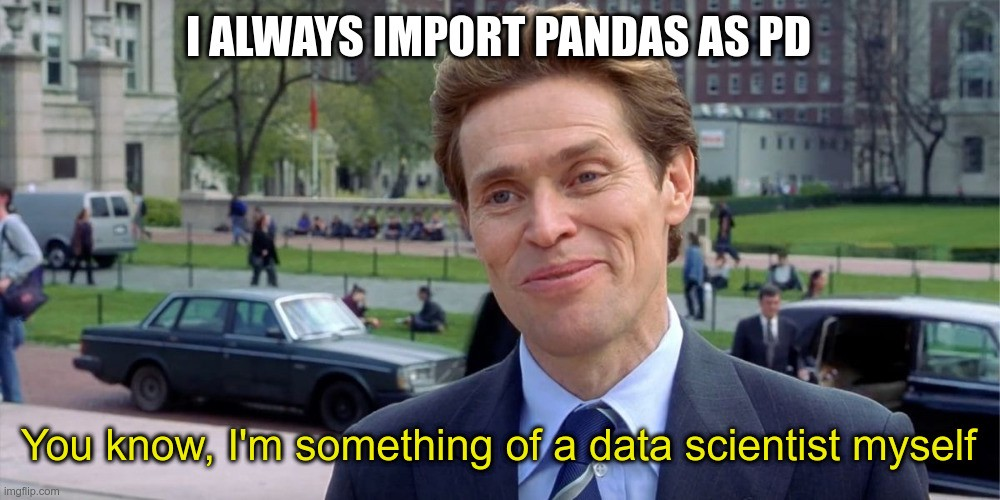

# Ferramenta Essencial: Pandas

Pandas é **a** biblioteca para análise de dados em Python.

Pandas é uma ferramenta extremamente versátil para manipular conjuntos de dados.

Ela também produz figuras de alta qualidade com `matplotlib` e se integra facilmente com outras bibliotecas que "esperam" `NumPy` *arrays*.

O uso de Pandas é uma boa __boa prática__ em Ciência de Dados.

A ferramenta mais importante que a biblioteca provê é a classe `DataFrame`.

Um (uma?) *data frame* é uma tabela cujas linhas e colunas têm rótulos.

Veremos hoje algumas operações básicas/importantes. Detalhes podem ser obtidos na documentação: https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.html.

Por que não usar Python nativo para manipular dados?
- Eficiência
- Número de linhas de código

## Getting started

In [ ]:
import numpy as np
import pandas as pd # prática comum

from pandas_datareader import data as web
from datetime import datetime

## Leitura e armazenamento

Com o propósito de demonstração, vamos utilizar Pandas para buscar dados do Yahoo! Finance.

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
# Esse código é uma gambiarra
import yfinance as yf
yf.pdr_override()

In [ ]:
stocks = 'YELP'
start = datetime(2015,1,1) # dica!
end = datetime(2015,12,31)

yahoo_stocks = web.get_data_yahoo(stocks, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
yahoo_stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,55.459999,55.599998,54.240002,55.150002,55.150002,1664500
2015-01-05,54.540001,54.950001,52.330002,52.529999,52.529999,2023000
2015-01-06,52.549999,53.930000,50.750000,52.439999,52.439999,3762800
2015-01-07,53.320000,53.750000,51.759998,52.209999,52.209999,1548200
2015-01-08,52.590000,54.139999,51.759998,53.830002,53.830002,2015300


In [ ]:
yahoo_stocks.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-23,27.950001,28.420000,27.440001,28.150000,28.150000,1001000
2015-12-24,28.270000,28.590000,27.900000,28.400000,28.400000,587400
2015-12-28,28.120001,28.379999,27.770000,27.879999,27.879999,1004500
2015-12-29,27.950001,28.540001,27.740000,28.480000,28.480000,1103900
2015-12-30,28.580000,28.780001,28.170000,28.250000,28.250000,1068000


In [ ]:
yahoo_stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,55.459999,55.599998,54.240002,55.150002,55.150002,1664500
2015-01-05,54.540001,54.950001,52.330002,52.529999,52.529999,2023000
2015-01-06,52.549999,53.930000,50.750000,52.439999,52.439999,3762800
2015-01-07,53.320000,53.750000,51.759998,52.209999,52.209999,1548200
2015-01-08,52.590000,54.139999,51.759998,53.830002,53.830002,2015300
...,...,...,...,...,...,...
2015-12-23,27.950001,28.420000,27.440001,28.150000,28.150000,1001000
2015-12-24,28.270000,28.590000,27.900000,28.400000,28.400000,587400
2015-12-28,28.120001,28.379999,27.770000,27.879999,27.879999,1004500


Esse é um exemplo típico de um *data frame*.

Note que cada **linha** tem um rótulo e cada **coluna** tem um rótulo.

Um objeto da classe `DataFrame` possui vários métodos **úteis** associados.

### Informações sobre o `DataFrame`

In [ ]:
yahoo_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2015-01-02 to 2015-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


### Exportando para `.csv`

In [ ]:
yahoo_stocks.to_csv('yahoo_data.csv')

In [ ]:
!ls

sample_data  yahoo_data.csv


In [ ]:
!head yahoo_data.csv

Date,Open,High,Low,Close,Adj Close,Volume
2015-01-02,55.459999084472656,55.599998474121094,54.2400016784668,55.150001525878906,55.150001525878906,1664500
2015-01-05,54.540000915527344,54.95000076293945,52.33000183105469,52.529998779296875,52.529998779296875,2023000
2015-01-06,52.54999923706055,53.93000030517578,50.75,52.439998626708984,52.439998626708984,3762800
2015-01-07,53.31999969482422,53.75,51.7599983215332,52.209999084472656,52.209999084472656,1548200
2015-01-08,52.59000015258789,54.13999938964844,51.7599983215332,53.83000183105469,53.83000183105469,2015300
2015-01-09,55.959999084472656,56.9900016784668,54.720001220703125,56.06999969482422,56.06999969482422,6224200
2015-01-12,56.0,56.060001373291016,53.43000030517578,54.02000045776367,54.02000045776367,2407700
2015-01-13,54.470001220703125,54.79999923706055,52.52000045776367,53.18000030517578,53.18000030517578,1958400
2015-01-14,52.79999923706055,53.68000030517578,51.459999084472656,52.20000076293945,52.20000076293945,1854600


### Importando de um `.csv`

In [ ]:
df = pd.read_csv('yahoo_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,55.459999,55.599998,54.240002,55.150002,55.150002,1664500
1,2015-01-05,54.540001,54.950001,52.330002,52.529999,52.529999,2023000
2,2015-01-06,52.549999,53.930000,50.750000,52.439999,52.439999,3762800
3,2015-01-07,53.320000,53.750000,51.759998,52.209999,52.209999,1548200
4,2015-01-08,52.590000,54.139999,51.759998,53.830002,53.830002,2015300


## Manipulando dados de colunas

Em geral, nós organizamos um `DataFrame` de forma que os **itens** sejam linhas e as **variáveis** (*features*) sejam colunas.

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Pandas permite o uso do padrão de **indexação** de Python para ter acesso às colunas (i.e., *features*) de um `DataFrame`.

In [ ]:
df['Open']

0      55.459999
1      54.540001
2      52.549999
3      53.320000
4      52.590000
         ...    
246    27.950001
247    28.270000
248    28.120001
249    27.950001
250    28.580000
Name: Open, Length: 251, dtype: float64

Pandas também permite acesso a uma coluna como se fosse **atributo do objeto**.

Isso funciona apenas quando não há espaço no nome da coluna.

In [ ]:
df.Open # encadeamento

0      55.459999
1      54.540001
2      52.549999
3      53.320000
4      52.590000
         ...    
246    27.950001
247    28.270000
248    28.120001
249    27.950001
250    28.580000
Name: Open, Length: 251, dtype: float64

É possível selecionar uma lista de colunas:

In [ ]:
df[['Open','Close']].head()

,Open,Close
0,55.459999,55.150002
1,54.540001,52.529999
2,52.549999,52.439999
3,53.320000,52.209999
4,52.590000,53.830002


Colocando tudo junto...

Certifique-se que a sintaxe abaixo faz sentido para você.

Observe a vantagem de se trabalhar com uma linguagem orientada a objetos.

In [ ]:
df.Date.head(10)

0    2015-01-02
1    2015-01-05
2    2015-01-06
3    2015-01-07
4    2015-01-08
5    2015-01-09
6    2015-01-12
7    2015-01-13
8    2015-01-14
9    2015-01-15
Name: Date, dtype: object

In [ ]:
df.Date.tail(10)

241    2015-12-16
242    2015-12-17
243    2015-12-18
244    2015-12-21
245    2015-12-22
246    2015-12-23
247    2015-12-24
248    2015-12-28
249    2015-12-29
250    2015-12-30
Name: Date, dtype: object

Modificar o nome das colunas é uma simples operação sobre o atributo `columns`.

Vamos ajustar os nomes das colunas de forma que nenhuma contenha espaços.


In [ ]:
new_column_names = [x.lower().replace(' ','_') for x in df.columns]
df.columns = new_column_names
df.head()

,date,open,high,low,close,adj_close,volume
0,2015-01-02,55.459999,55.599998,54.240002,55.150002,55.150002,1664500
1,2015-01-05,54.540001,54.950001,52.330002,52.529999,52.529999,2023000
2,2015-01-06,52.549999,53.930000,50.750000,52.439999,52.439999,3762800
3,2015-01-07,53.320000,53.750000,51.759998,52.209999,52.209999,1548200
4,2015-01-08,52.590000,54.139999,51.759998,53.830002,53.830002,2015300


(certifique-se que você entendeu bem a __list comprehension__ usada acima -- é uma operação comum e importante em Python.)

Agora, **todas** as colunas podem ser acessadas usando a notação com **ponto**.

In [ ]:
df.adj_close.head()

0    55.150002
1    52.529999
2    52.439999
3    52.209999
4    53.830002
Name: adj_close, dtype: float64

## Uma amostra de métodos relevantes

### Descrição básica de dados

In [ ]:
df[['high', 'low', 'open', 'close', 'volume', 'adj_close']].mean() # Média

high         3.809084e+01
low          3.659777e+01
open         3.732426e+01
close        3.733303e+01
volume       3.501135e+06
adj_close    3.733303e+01
dtype: float64

In [ ]:
df[['high', 'low', 'open', 'close', 'volume', 'adj_close']].std() # Desvio Padrão

high         1.138931e+01
low          1.114006e+01
open         1.128846e+01
close        1.126194e+01
volume       4.152341e+06
adj_close    1.126194e+01
dtype: float64

In [ ]:
df[['high', 'low', 'open', 'close', 'volume', 'adj_close']].median() # Mediana

high         3.909000e+01
low          3.665000e+01
open         3.822000e+01
close        3.818000e+01
volume       2.356000e+06
adj_close    3.818000e+01
dtype: float64

In [ ]:
df.open.mean() # Média da variável 'Open'

37.3242629229785

In [ ]:
df.high.mean() # Média da variável 'High'

38.09083672633684

In [ ]:
df.describe() # Estatísticas descritivas do data frame

,open,high,low,close,adj_close,volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,37.324263,38.090837,36.597769,37.333028,37.333028,3.501135e+06
std,11.288464,11.389306,11.140061,11.261941,11.261941,4.152341e+06
min,20.750000,21.870001,20.500000,20.870001,20.870001,5.874000e+05
25%,25.220000,25.840000,24.855000,25.365000,25.365000,1.831900e+06
50%,38.220001,39.090000,36.650002,38.180000,38.180000,2.356000e+06
75%,47.264999,47.995001,46.709999,47.349998,47.349998,3.378200e+06
max,57.599998,57.700001,56.080002,57.470001,57.470001,3.459890e+07


### Gráficos com `matplotlib`

Gerar gráficos (vários tipos) com Pandas é uma tarefa bem simples.

Veremos mais detalhes sobre visualização de dados na próxima aula.

#### Gráfico de uma Série Temporal

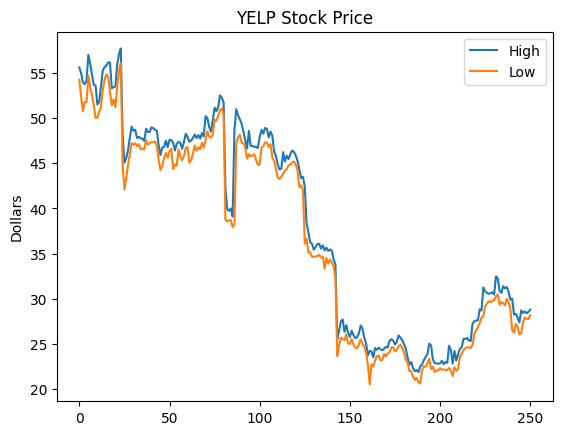

In [ ]:
import matplotlib.pyplot as plt # biblioteca gráfica

df.high.plot(label='High') # plotar o preço máximo
df.low.plot(label='Low')
plt.title('YELP Stock Price')
plt.ylabel('Dollars')
plt.legend(loc='best');

#### Histograma

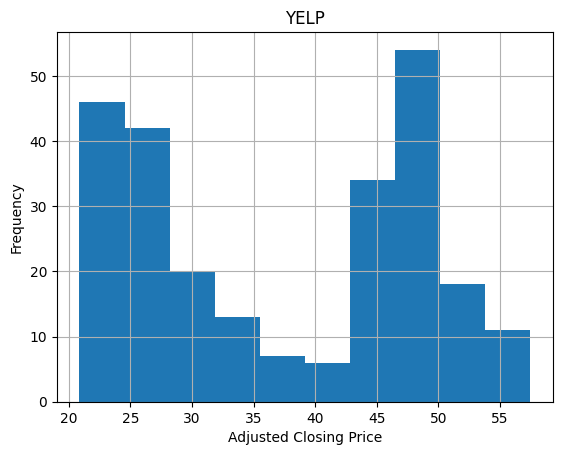

In [ ]:
df.adj_close.hist()
plt.xlabel('Adjusted Closing Price')
plt.ylabel('Frequency')
plt.title('YELP');

### Operações de sumarização

Métodos como ``sum()`` and ``std()`` funcionam para uma coluna inteira.

Podemos executar nossas próprias funções sobre todos os valores de uma coluna (ou linha) usando ``apply()``.


Como exemplo, vamos voltar ao seguinte gráfico:

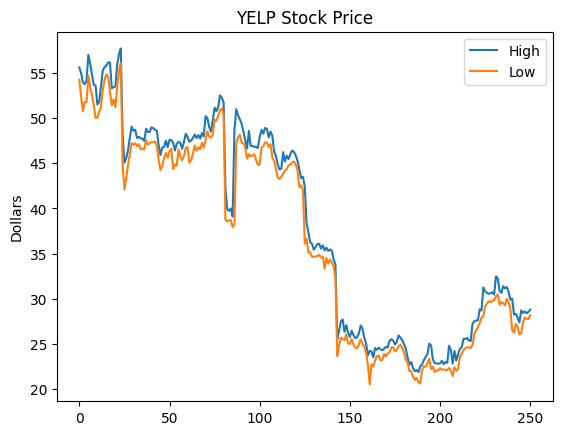

In [ ]:
df.high.plot(label='High')
df.low.plot(label='Low')
plt.title('YELP Stock Price')
plt.ylabel('Dollars')
plt.legend(loc='best');

Esse gráfico é **quase** perfeito. O único problema é que o eixo $x$ deveria mostrar tempo.

Para consertar esse problema, precisamos fazer o **índice** do ``DataFrame`` assumir o valor das datas.

Nós temos um problema: as datas em nosso *data frame* são *strings*. Precisamos transformá-las em algum tipo data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       251 non-null    object 
 1   open       251 non-null    float64
 2   high       251 non-null    float64
 3   low        251 non-null    float64
 4   close      251 non-null    float64
 5   adj_close  251 non-null    float64
 6   volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


O atributo ``values`` de uma coluna retorna a lista de valores que a coluna possui.

Inspecionando o primeiro valor da lista, podemos ver que esses valores possuem um formato específico.

In [ ]:
first_date = df.date.values[0]
first_date

'2015-01-02'

Para converter essas *strings* em datas, vamos usar a classe ``datetime``.

In [ ]:
from datetime import datetime

datetime.strptime(first_date, "%Y-%m-%d")

datetime.datetime(2015, 1, 2, 0, 0)

In [ ]:
new_df = df.copy() # copiando o dataframe
new_df.date = df.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
new_df.date.head()

0   2015-01-02
1   2015-01-05
2   2015-01-06
3   2015-01-07
4   2015-01-08
Name: date, dtype: datetime64[ns]

Cada linha em um *data frame* é associada a um índice, o qual é um rótulo que unicamente identifica a linha.

Os índices até agora eram inteiros gerados automaticamente a partir de 0.

Podemos consertar isso modificando o atributo `index`.

In [ ]:
new_df.set_index('date', inplace = True)
new_df.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2015-01-02,55.459999,55.599998,54.240002,55.150002,55.150002,1664500
2015-01-05,54.540001,54.950001,52.330002,52.529999,52.529999,2023000
2015-01-06,52.549999,53.930000,50.750000,52.439999,52.439999,3762800
2015-01-07,53.320000,53.750000,51.759998,52.209999,52.209999,1548200
2015-01-08,52.590000,54.139999,51.759998,53.830002,53.830002,2015300


Fazendo o gráfico novamente...

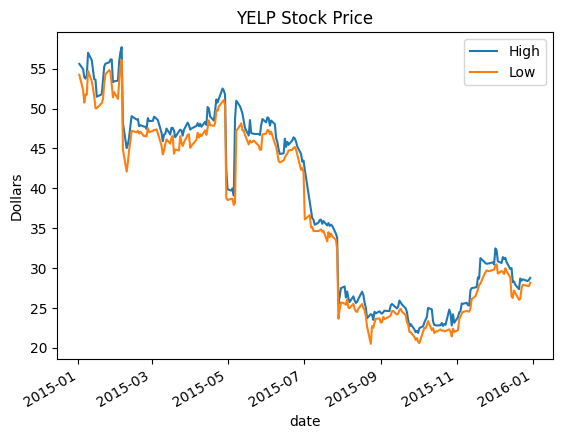

In [ ]:
new_df.high.plot(label='High')
new_df.low.plot(label='Low')
plt.title('YELP Stock Price')
plt.ylabel('Dollars')
plt.legend(loc='best');

### Acesso às linhas

Para acessar as linhas de um *data frame*, usamos uma notação (método) diferente, ``loc[]``.

In [ ]:
new_df.loc[datetime(2015,1,23,0,0)]

open         5.466000e+01
high         5.564000e+01
low          5.430000e+01
close        5.519000e+01
adj_close    5.519000e+01
volume       1.636400e+06
Name: 2015-01-23 00:00:00, dtype: float64

In [ ]:
new_df.loc['2015-1-23'] # faz a conversão de string para datetime

open         5.466000e+01
high         5.564000e+01
low          5.430000e+01
close        5.519000e+01
adj_close    5.519000e+01
volume       1.636400e+06
Name: 2015-01-23 00:00:00, dtype: float64

In [ ]:
new_df.loc['2015-1-23':'2015-02-13'] # seleção por intervalos

,open,high,low,close,adj_close,volume
date,,,,,,
2015-01-23,54.660000,55.639999,54.299999,55.189999,55.189999,1636400
2015-01-26,55.119999,55.790001,54.830002,55.410000,55.410000,1450300
2015-01-27,56.060001,56.160000,54.570000,55.630001,55.630001,2410400
2015-01-28,56.150002,56.150002,52.919998,53.000000,53.000000,2013100
2015-01-29,52.849998,53.310001,51.410000,52.930000,52.930000,1844100
2015-01-30,52.590000,53.419998,52.049999,52.470001,52.470001,1875400
2015-02-02,52.939999,53.500000,51.209999,53.470001,53.470001,2105500
2015-02-03,53.830002,55.930000,53.410000,55.779999,55.779999,2885400
2015-02-04,55.529999,57.070000,55.250000,56.740002,56.740002,2498600


In [ ]:
new_df.loc['2015-1-23':'2015-02-13', ['low', 'high']] # seleção por intervalos, restringindo colunas

,low,high
date,,
2015-01-23,54.299999,55.639999
2015-01-26,54.830002,55.790001
2015-01-27,54.570000,56.160000
2015-01-28,52.919998,56.150002
2015-01-29,51.410000,53.310001
2015-01-30,52.049999,53.419998
2015-02-02,51.209999,53.500000
2015-02-03,53.410000,55.930000
2015-02-04,55.250000,57.070000


Para acessar uma linha por seu número de sequência (i.e., com o índice de um *array*), use ``iloc[]``.

In [ ]:
new_df.iloc[0,:] # linha 0

open         5.546000e+01
high         5.560000e+01
low          5.424000e+01
close        5.515000e+01
adj_close    5.515000e+01
volume       1.664500e+06
Name: 2015-01-02 00:00:00, dtype: float64

In [ ]:
new_df.iloc[10:15, 2:4] # linhas 10, 11, 12, 13, 14 e colunas 2, 3

,low,close
date,,
2015-01-16,50.029999,51.389999
2015-01-20,50.689999,51.410000
2015-01-21,51.200001,53.410000
2015-01-22,53.119999,54.799999
2015-01-23,54.299999,55.189999


Para iterar sobre as linhas, use `iterrows()`

In [ ]:
# FEIO!
num_positive_days = 0
for idx, row in df.iterrows():
    if row.close > row.open:
        num_positive_days += 1

print("The total number of positive-gain days is %d." % num_positive_days)

The total number of positive-gain days is 125.


### Filtrando dados

É fácil selecionar um subconjunto de interesse das linhas.

In [ ]:
tmp_high = new_df.high > 55 # tmp_high é uma 'máscara'
tmp_high.head()

date
2015-01-02     True
2015-01-05    False
2015-01-06    False
2015-01-07    False
2015-01-08    False
Name: high, dtype: bool

Somar um vetor de booleanos é o mesmo que contar o número de valores ``True``.

In [ ]:
sum(tmp_high)

11

Podemos selecionar apenas as linhas correspondentes a `tmp_high`.


In [ ]:
new_df[tmp_high]

,open,high,low,close,adj_close,volume
date,,,,,,
2015-01-02,55.459999,55.599998,54.240002,55.150002,55.150002,1664500
2015-01-09,55.959999,56.990002,54.720001,56.070000,56.070000,6224200
2015-01-12,56.000000,56.060001,53.430000,54.020000,54.020000,2407700
2015-01-22,53.869999,55.279999,53.119999,54.799999,54.799999,2295400
2015-01-23,54.660000,55.639999,54.299999,55.189999,55.189999,1636400
2015-01-26,55.119999,55.790001,54.830002,55.410000,55.410000,1450300
2015-01-27,56.060001,56.160000,54.570000,55.630001,55.630001,2410400
2015-01-28,56.150002,56.150002,52.919998,53.000000,53.000000,2013100
2015-02-03,53.830002,55.930000,53.410000,55.779999,55.779999,2885400


Juntando as duas partes, temos um padrão de código comum em pandas:

In [ ]:
positive_days = new_df[new_df.close > new_df.open]
positive_days.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2015-01-08,52.590000,54.139999,51.759998,53.830002,53.830002,2015300
2015-01-09,55.959999,56.990002,54.720001,56.070000,56.070000,6224200
2015-01-16,50.180000,51.490002,50.029999,51.389999,51.389999,2183300
2015-01-21,51.200001,53.500000,51.200001,53.410000,53.410000,3248100
2015-01-22,53.869999,55.279999,53.119999,54.799999,54.799999,2295400


In [ ]:
very_positive_days = new_df[(new_df.close - new_df.open) > 4]
very_positive_days.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2015-05-07,38.220001,48.73,38.220001,47.009998,47.009998,33831600


### Criandos novas colunas (*features*)

Para criar uma nova coluna, é necessário (apenas) associar um valor a ela.


In [ ]:
new_df['profit'] = (new_df.open < new_df.close)
new_df.head()

,open,high,low,close,adj_close,volume,profit
date,,,,,,,
2015-01-02,55.459999,55.599998,54.240002,55.150002,55.150002,1664500,False
2015-01-05,54.540001,54.950001,52.330002,52.529999,52.529999,2023000,False
2015-01-06,52.549999,53.930000,50.750000,52.439999,52.439999,3762800,False
2015-01-07,53.320000,53.750000,51.759998,52.209999,52.209999,1548200,False
2015-01-08,52.590000,54.139999,51.759998,53.830002,53.830002,2015300,True


Vamos dar a cada linha um valor de ganho, associado a uma variável **categórica**:


In [ ]:
# FEIO!
for idx, row in new_df.iterrows():
    if row.open > row.close:
        new_df.loc[idx,'gain']='negative'
    elif (row.close - row.open) < 1:
        new_df.loc[idx,'gain']='small_gain'
    elif (row.close - row.open) < 6:
        new_df.loc[idx,'gain']='medium_gain'
    else:
        new_df.loc[idx,'gain']='large_gain'
new_df.head()

,open,high,low,close,adj_close,volume,profit,gain
date,,,,,,,,
2015-01-02,55.459999,55.599998,54.240002,55.150002,55.150002,1664500,False,negative
2015-01-05,54.540001,54.950001,52.330002,52.529999,52.529999,2023000,False,negative
2015-01-06,52.549999,53.930000,50.750000,52.439999,52.439999,3762800,False,negative
2015-01-07,53.320000,53.750000,51.759998,52.209999,52.209999,1548200,False,negative
2015-01-08,52.590000,54.139999,51.759998,53.830002,53.830002,2015300,True,medium_gain


Aqui temos uma outra, mais "funcional", maneira de fazer a mesma coisa.

Defina uma função que classifica cada linha e use ``apply()`` para aplicá-la ao *data frame*.


In [ ]:
# "Bonito"!
def namerow(row):
    if row.open > row.close:
        return 'negative'
    elif (row.close - row.open) < 1:
        return 'small_gain'
    elif (row.close - row.open) < 6:
        return 'medium_gain'
    else:
        return 'large_gain'

new_df['test_column'] = new_df.apply(namerow, axis = 1)


In [ ]:
new_df.head()

,open,high,low,close,adj_close,volume,profit,gain,test_column
date,,,,,,,,,
2015-01-02,55.459999,55.599998,54.240002,55.150002,55.150002,1664500,False,negative,negative
2015-01-05,54.540001,54.950001,52.330002,52.529999,52.529999,2023000,False,negative,negative
2015-01-06,52.549999,53.930000,50.750000,52.439999,52.439999,3762800,False,negative,negative
2015-01-07,53.320000,53.750000,51.759998,52.209999,52.209999,1548200,False,negative,negative
2015-01-08,52.590000,54.139999,51.759998,53.830002,53.830002,2015300,True,medium_gain,medium_gain


OK, entendido! Vamos desconsiderar a coluna `test_column`.


In [ ]:
new_df.drop('test_column', axis = 1, inplace = True)

### Agregação por chave

Um método **extremamente** poderoso é o ``groupby()``.

Funciona de forma similar ao ``GROUP BY`` do SQL.

Agrupa as linhas de um *data frame* pelos valores em uma (ou mais) coluna, e permite que você itere sobre cada grupo.

Vamos olhar para o ganho médio dentro de cada categoria de ganho (que definimos no último exemplo).

In [ ]:
gain_groups = new_df.groupby('gain')

Essencialmente, `gain_groups` se comporta como um dicionário:
* as chaves são os valores únicos da coluna ``gain``.
* os valores são `DataFrames` que contém apenas as linhas correspondentes à chave.

In [ ]:
for gain, gain_data in gain_groups:
    print(gain)
    print(gain_data.head())
    print('=============================')

large_gain
                 open   high        low      close  adj_close    volume  \
date                                                                      
2015-05-07  38.220001  48.73  38.220001  47.009998  47.009998  33831600   

            profit        gain  
date                            
2015-05-07    True  large_gain  
medium_gain
                 open       high        low      close  adj_close   volume  \
date                                                                         
2015-01-08  52.590000  54.139999  51.759998  53.830002  53.830002  2015300   
2015-01-16  50.180000  51.490002  50.029999  51.389999  51.389999  2183300   
2015-01-21  51.200001  53.500000  51.200001  53.410000  53.410000  3248100   
2015-02-03  53.830002  55.930000  53.410000  55.779999  55.779999  2885400   
2015-02-04  55.529999  57.070000  55.250000  56.740002  56.740002  2498600   

            profit         gain  
date                             
2015-01-08    True  medium_gain  
201

In [ ]:
for gain, gain_data in new_df.groupby("gain"):
    print('The average closing value for the %s group is %f' % (gain,
                                                           gain_data.close.mean()))

The average closing value for the large_gain group is 47.009998
The average closing value for the medium_gain group is 39.723077
The average closing value for the negative group is 37.384762
The average closing value for the small_gain group is 36.533673


Ou

In [ ]:
new_df.groupby(['gain'])['close'].mean()

gain
large_gain     47.009998
medium_gain    39.723077
negative       37.384762
small_gain     36.533673
Name: close, dtype: float64

Também podemos utilizar ``groupby`` para fazer gráficos com MUITA INFORMAÇÃO em poucas linhas

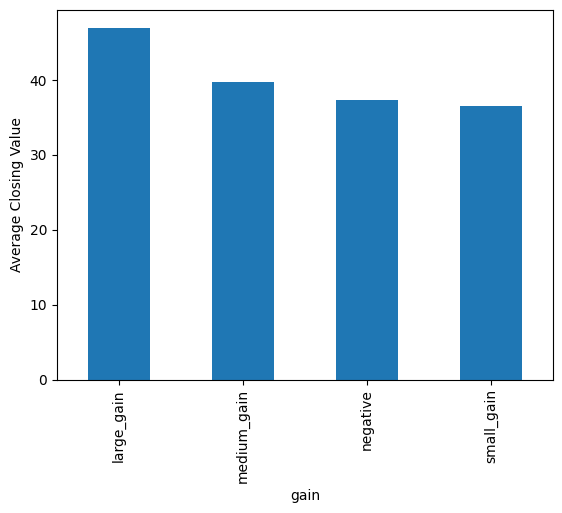

In [ ]:
new_df.groupby(['gain'])['close'].mean().plot(kind = 'bar')
plt.ylabel('Average Closing Value');

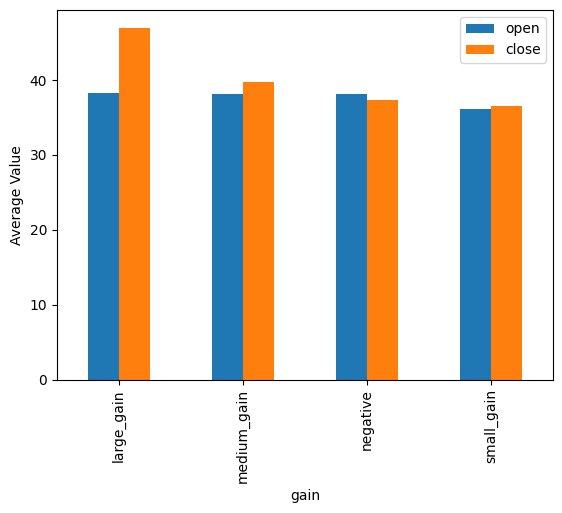

In [ ]:
new_df.groupby(['gain'])[['open', 'close']].mean().plot(kind = 'bar')
plt.ylabel('Average Value');

A lista de possibilidades é longa aqui...
Falaremos mais sobre **visualização de dados na aula que vem**, mas vamos focar na biblioteca ``seaborn``.

### Ordenação

In [ ]:
new_df.sort_index(ascending = False)

,open,high,low,close,adj_close,volume,profit,gain
date,,,,,,,,
2015-12-30,28.580000,28.780001,28.170000,28.250000,28.250000,1068000,False,negative
2015-12-29,27.950001,28.540001,27.740000,28.480000,28.480000,1103900,True,small_gain
2015-12-28,28.120001,28.379999,27.770000,27.879999,27.879999,1004500,False,negative
2015-12-24,28.270000,28.590000,27.900000,28.400000,28.400000,587400,True,small_gain
2015-12-23,27.950001,28.420000,27.440001,28.150000,28.150000,1001000,True,small_gain
...,...,...,...,...,...,...,...,...
2015-01-08,52.590000,54.139999,51.759998,53.830002,53.830002,2015300,True,medium_gain
2015-01-07,53.320000,53.750000,51.759998,52.209999,52.209999,1548200,False,negative
2015-01-06,52.549999,53.930000,50.750000,52.439999,52.439999,3762800,False,negative


In [ ]:
df = pd.DataFrame({'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],
                   'col2' : [2, 1, 9, 8, 7, 4],
                   'col3': [0, 1, 9, 4, 2, 3],})
df

,col1,col2,col3
0,A,2,0
1,A,1,1
2,B,9,9
3,NaN,8,4
4,D,7,2
5,C,4,3


In [ ]:
df.sort_values(by = ['col1'])

,col1,col2,col3
0,A,2,0
1,A,1,1
2,B,9,9
5,C,4,3
4,D,7,2
3,NaN,8,4


In [ ]:
df.sort_values(by = ['col1', 'col2'], ascending = [False, True])

,col1,col2,col3
4,D,7,2
5,C,4,3
2,B,9,9
1,A,1,1
0,A,2,0
3,NaN,8,4


### Junção

In [ ]:
df1 = pd.DataFrame({'key': ['foo', 'bar', 'baz', 'foo'],
                    'A': [1, 2, 3, 5]})
df1

,key,A
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [ ]:
df2 = pd.DataFrame({'key': ['foo', 'bar', 'baz', 'foo'],
                    'B': [5, 6, 7, 8]})
df2

,key,B
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [ ]:
df1.merge(df2, on = 'key')

,key,A,B
0,foo,1,5
1,foo,1,8
2,foo,5,5
3,foo,5,8
4,bar,2,6
5,baz,3,7


## Outras classes do Pandas

Um `DataFrame` é essencialmente um *array* 2-D anotado.

Pandas também tem versões anotadas de arrays 1-D e 3-D.

Um vetor anotado 1-D é chamado `Series`.
Um vetor anotado 3-D é chamado `MultiIndex`.


# Pequeno experimento

Como uma última tarefa, vamos usar a experiência de até agora para comparar o desempenho de diferentes ações obtidas do Yahoo! Finance.


In [ ]:
stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
attr = 'Close'
stock_df = web.get_data_yahoo(stocks, start = datetime(2014, 1, 1), end = datetime(2014, 12, 31))[attr]

[*********************100%%**********************]  5 of 5 completed


In [ ]:
stock_df.head()

,IBM,MSFT,ORCL,TSLA,YELP
Date,,,,,
2014-01-02,177.370941,37.160000,37.840000,10.006667,67.919998
2014-01-03,178.432129,36.910000,37.619999,9.970667,67.660004
2014-01-06,177.820267,36.130001,37.470001,9.800000,71.720001
2014-01-07,181.367111,36.410000,37.849998,9.957333,72.660004
2014-01-08,179.703629,35.759998,37.720001,10.085333,78.419998


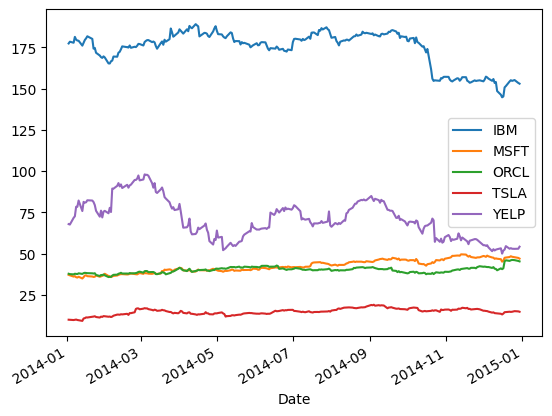

In [ ]:
stock_df.plot();

Agora, vamos calcular os retornos sobre um período de tempo $T$, de acordo com a definição:

$$ r(t) = \frac{f(t)-f(t-T)}{f(t)} $$

Os retornos podem ser computados com um métodos simples ``pct_change()``. Note que os primeiros $T$ valores não estão definidos.


In [ ]:
rets = stock_df.pct_change(30)
rets.iloc[25:35]

,IBM,MSFT,ORCL,TSLA,YELP
Date,,,,,
2014-02-07,NaN,NaN,NaN,NaN,NaN
2014-02-10,NaN,NaN,NaN,NaN,NaN
2014-02-11,NaN,NaN,NaN,NaN,NaN
2014-02-12,NaN,NaN,NaN,NaN,NaN
2014-02-13,NaN,NaN,NaN,NaN,NaN
2014-02-14,-0.009918,0.012379,0.003700,0.320653,0.321849
2014-02-18,-0.018485,0.013817,0.009304,0.361995,0.355897
2014-02-19,-0.016398,0.038195,0.010675,0.317279,0.254880
2014-02-20,-0.028728,0.036803,0.011096,0.405798,0.257501


Agora, vamos fazer o gráfico das séries de tempo dos retornos das diferentes ações.

Note que os `NaN`s são removidos automaticamente do gráfico


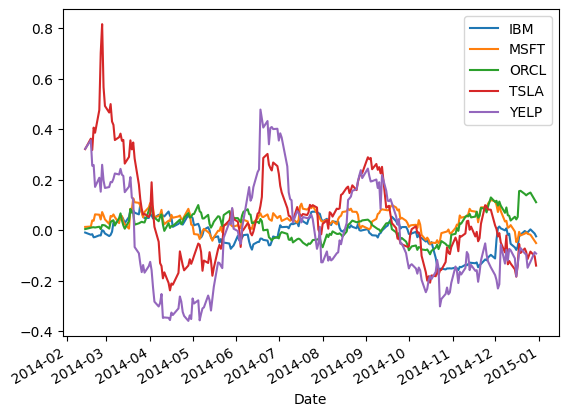

In [ ]:
rets.plot();

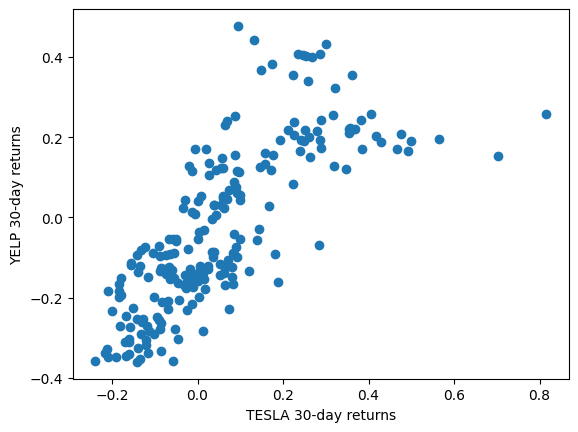

In [ ]:
plt.scatter(rets.TSLA, rets.YELP)
plt.xlabel('TESLA 30-day returns')
plt.ylabel('YELP 30-day returns');

Parece haver uma correlação entre os movimentos da TSLA e YELP. Vamos medir isso!


Pandas tem um método para calcular o coeficiente de correlação entre todos os pares de colunas de um *data frame*.

In [ ]:
rets.corr() # Veja que o resultado é um data frame

,IBM,MSFT,ORCL,TSLA,YELP
IBM,1.000000,0.343697,0.026666,0.196371,0.104705
MSFT,0.343697,1.000000,0.131830,0.411348,0.264703
ORCL,0.026666,0.131830,1.000000,0.007218,-0.083688
TSLA,0.196371,0.411348,0.007218,1.000000,0.769623
YELP,0.104705,0.264703,-0.083688,0.769623,1.000000


Esses valores podem ser facilmente inspecionados por meio de um mapa de calor.

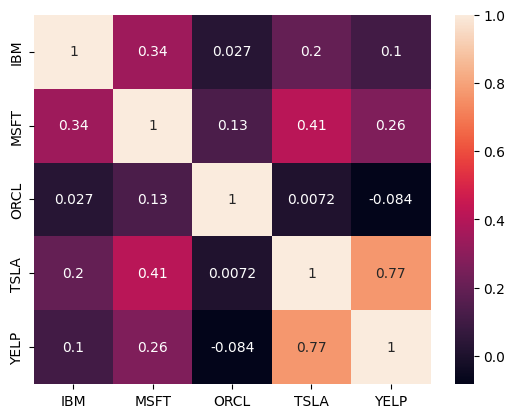

In [ ]:
import seaborn as sns # Cenas da próxima aula...
sns.heatmap(rets.corr(), annot = True);

Finalmente, é importante saber que os gráficos feitos por Pandas são apenas uma camada por cima da biblioteca `matplotlib`.

Assim, os gráficos de Pandas podem (e frequentemente devem) ser melhorados usando funções da `matplotlib`.

Por exemplo, suponha que deseja-se saber o **retorno esperado** e o **risco**

- **Retorno Esperado**: média dos retornos em um período de tempo
- **Risco**: desvio padrão dos retornos em um período de tempo

Aqui, temos uma visualização do resultado de tal análise.


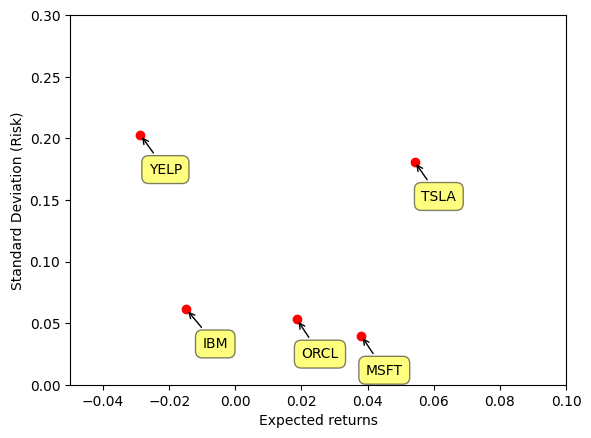

In [ ]:
# plt.scatter(rets.mean(), rets.std());
plt.xlabel('Expected returns')
plt.ylabel('Standard Deviation (Risk)')
plt.xlim([-.05,.1])
plt.ylim([0,.3])
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.scatter([x,], [y, ], color = 'red')
    plt.annotate(
        label,
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# What is next?

Pratique!
- Sugiro o tutorial [10 minutes to Pandas](https://pandas.pydata.org/)

Pandas é uma biblioteca gigante
- Se você precisar fazer alguma coisa com seus dados, provavelmente há uma função pronta para isso

E se meu conjunto de dados for muito grande?
- [Spark](https://spark.apache.org/)